Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00        31

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



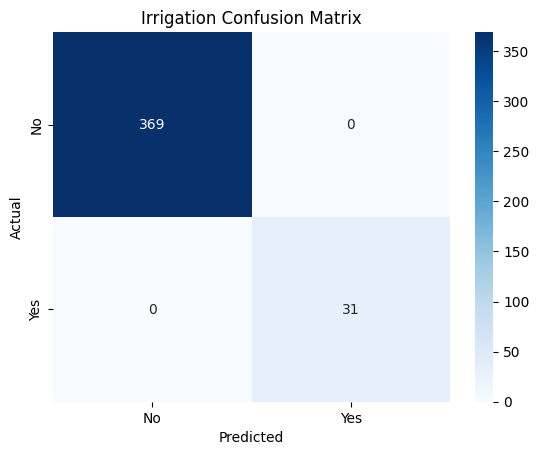

Average cross-validation score: 1.0
Irrigation Needed


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load the dataset
df = pd.read_csv("synthetic_soil_data.csv")

# Create irrigation label
def label_irrigation(row):
    if row["soil_moisture"] < 30 and row["rainfall"] < 60:
        return 1  # Irrigation needed
    return 0  # No irrigation needed

df["irrigate"] = df.apply(label_irrigation, axis=1)

# Features and target
X = df[["temperature", "soil_moisture", "rainfall"]]
y = df["irrigate"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Hyperparameter tuning (optional)
param_grid = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
clf = grid_search.best_estimator_

# Save model
joblib.dump(clf, "irrigation_model.pkl")

# Predict on test data
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Irrigation Confusion Matrix")
plt.show()

# Cross-validation score
cross_val_scores = cross_val_score(clf, X, y, cv=5)
print("Average cross-validation score:", cross_val_scores.mean())

# Example prediction
sensor_data = {
    "temperature": 33,
    "soil_moisture": 25,
    "rainfall": 0.0
}
input_df = pd.DataFrame([sensor_data])
prediction = clf.predict(input_df)[0]
print("Irrigation Needed" if prediction == 1 else "No Irrigation Needed")


In [10]:
!pip install seaborn

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV accuracy:", scores.mean())


Cross-validation scores: [1.         0.99384615 1.         1.         1.        ]
Average CV accuracy: 0.9987692307692309
